In [1]:
import nltk
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("punkt")
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
from gensim.models.coherencemodel import CoherenceModel

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
from google.colab import files
uploaded = files.upload()

Saving final_text1.csv to final_text1.csv


In [3]:
import pandas as pd
df = pd.read_csv("final_text1.csv")

In [4]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 8.4MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=ffdbab5d7e93a6152c5b1bb34b989b2a0db67f7113fa833a232b7fa14c0e87c3
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [5]:
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
import csv
from csv import reader
titles = []
with open("final_text1.csv", 'r') as read_obj:
    # pass the file object to reader() to get the reader object
    csv_reader = reader(read_obj)
    # Iterate over each row in the csv using reader object
    for row in csv_reader:
        # row variable is a list that represents a row in csv
        titles.append(row)

In [9]:
print(len(titles))

3790


In [12]:
values = []
for i in titles:
  try:
    values.append(i[2])
  except:
    pass

In [13]:
z = []
with open("final_text1.csv", 'r') as read_obj:
    # pass the file object to reader() to get the reader object
    csv_reader = reader(read_obj)
    # Iterate over each row in the csv using reader object
    for row in csv_reader:
        # row variable is a list that represents a row in csv
        z.append(row)

In [14]:
print(z[:10])

[['3', 'Abdulkader N;Brun JL', "['induct', 'detect', 'isol', 'temperaturesensit', 'appli', 'seri', 'techniqu', 'intend', 'induc', 'detect']"], ['5', 'Abi-Rached M;Brun JL', "['etud', 'ultrastructural', 'de', 'relat', 'entr', 'ovocyt', 'et', 'diakinesi', 'develop', 'oocyt', 'c']"], ['6', 'Abi-Rached M;Brun JL', "['ultrastructur', 'chang', 'nuclear', 'perinuclear', 'electron', 'microscop', 'studi', 'around', 'nucleu', 'c']"], ['7', 'Abi-Rached M;Brun JL', "['chang', 'synaptonem', 'complex', 'oocyt', 'nucleu', 'oogenesi', 'hermaphrodit', 'nematod', 'c', 'elegan']"], ['8', 'Albertson DG;Sulston JE;White JG', "['cell', 'cycl', 'dna', 'replic', 'mutant', 'block', 'postembryon', 'develop', 'nematod']"], ['9', 'Albertson DG;Thomson JN', "['pharynx', 'c', 'elegan', 'anatomi', 'pharynx', 'caenorhabd', 'elegan']"], ['10', 'Ali M;Wahab A;El-Kifel AH', "['nematod', 'associ', 'coleoptera', 'speci', 'egypt', 'part', 'anatomi', 'pharynx', 'caenorhabd', 'elegan']"], ['11', 'Anderson GL', "['respons', '

In [15]:
values = []
values = z

In [16]:
values = []
for i in titles:
  try:
    values.append(i[2])
  except:
    pass


In [17]:
print(values[:10])

["['induct', 'detect', 'isol', 'temperaturesensit', 'appli', 'seri', 'techniqu', 'intend', 'induc', 'detect']", "['etud', 'ultrastructural', 'de', 'relat', 'entr', 'ovocyt', 'et', 'diakinesi', 'develop', 'oocyt', 'c']", "['ultrastructur', 'chang', 'nuclear', 'perinuclear', 'electron', 'microscop', 'studi', 'around', 'nucleu', 'c']", "['chang', 'synaptonem', 'complex', 'oocyt', 'nucleu', 'oogenesi', 'hermaphrodit', 'nematod', 'c', 'elegan']", "['cell', 'cycl', 'dna', 'replic', 'mutant', 'block', 'postembryon', 'develop', 'nematod']", "['pharynx', 'c', 'elegan', 'anatomi', 'pharynx', 'caenorhabd', 'elegan']", "['nematod', 'associ', 'coleoptera', 'speci', 'egypt', 'part', 'anatomi', 'pharynx', 'caenorhabd', 'elegan']", "['respons', 'dauerlarva', 'c', 'elegan', 'nematoda', 'larval', 'form', 'freeliv', 'nematod', 'caenorhabd']", "['critic', 'oxygen', 'tension', 'c', 'elegan', 'regul', 'abl', 'maintain', 'stabl', 'oxygen']", "['effect', 'bacteria', 'dispers', 'c', 'elegan', 'dispers', 'behav

In [19]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = set(stopwords.words('english'))
# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()
    
doc_set = values
# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)


dictionary = corpora.Dictionary(texts)
    

corpus = [dictionary.doc2bow(text) for text in texts]




In [29]:
# generate LDA model
lda = models.LdaMulticore(corpus, id2word=dictionary, num_topics=8, workers=4, chunksize=20, passes=1, batch=True, alpha='symmetric',
                 eta=1, decay=0.8, offset=1.0, eval_every=1, iterations=1,
                 gamma_threshold=0.01, random_state=12)
top_8 = lda.print_topics(num_topics=8, num_words=5)

c = 0
for i in top_8:

  c += 1
  print("Topic "+str(c))
  print(i)
coherence_model_lda = CoherenceModel(model=lda, texts=texts, dictionary=dictionary, coherence='c_v')

print(coherence_model_lda.get_coherence())

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

Topic 1
(0, '0.025*"elegan" + 0.019*"caenorhabd" + 0.016*"gene" + 0.014*"nematod" + 0.010*"c"')
Topic 2
(1, '0.021*"caenorhabd" + 0.021*"elegan" + 0.014*"gene" + 0.014*"c" + 0.013*"nematod"')
Topic 3
(2, '0.027*"elegan" + 0.017*"caenorhabd" + 0.013*"nematod" + 0.013*"gene" + 0.010*"c"')
Topic 4
(3, '0.027*"elegan" + 0.025*"caenorhabd" + 0.014*"gene" + 0.013*"nematod" + 0.013*"c"')
Topic 5
(4, '0.025*"elegan" + 0.016*"caenorhabd" + 0.015*"gene" + 0.014*"nematod" + 0.012*"c"')
Topic 6
(5, '0.025*"elegan" + 0.020*"caenorhabd" + 0.015*"nematod" + 0.014*"gene" + 0.012*"c"')
Topic 7
(6, '0.017*"caenorhabd" + 0.016*"elegan" + 0.012*"nematod" + 0.012*"gene" + 0.010*"c"')
Topic 8
(7, '0.024*"elegan" + 0.018*"caenorhabd" + 0.016*"nematod" + 0.013*"c" + 0.012*"gene"')
0.1778415864070375


In [30]:
import pyLDAvis
pyLDAvis.enable_notebook()
visualisation = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
visualisation

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.000652 -0.000758       1        1  12.747238
4      0.000313 -0.000427       2        1  12.592916
3      0.001535 -0.000350       3        1  12.583465
0     -0.000050  0.000591       4        1  12.572159
1     -0.000053 -0.000785       5        1  12.509917
6     -0.002675 -0.000352       6        1  12.447195
7      0.000065  0.001561       7        1  12.289122
2      0.000213  0.000520       8        1  12.257988, topic_info=           Term        Freq       Total Category  logprob  loglift
29       elegan  907.000000  907.000000  Default  30.0000  30.0000
42   caenorhabd  729.000000  729.000000  Default  29.0000  29.0000
9             c  441.000000  441.000000  Default  28.0000  28.0000
198     protein  204.000000  204.000000  Default  27.0000  27.0000
11      develop  181.000000  181.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
480     control    8.655296   80.755974   Topic8  -6.2937  -0.1343
221     charact    8.531082   80.247734   Topic8  -6.3082  -0.1424
249    function    7.925866   68.793509   Topic8  -6.3818  -0.0620
336         two    8.437923   95.586729   Topic8  -6.3192  -0.3283
27        studi    8.339852   94.569792   Topic8  -6.3308  -0.3293

[550 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
430       1  0.128867      1
430       2  0.161084      1
430       3  0.096650      1
430       4  0.161084      1
430       5  0.128867      1
...     ...       ...    ...
1062      4  0.139523  young
1062      5  0.139523  young
1062      6  0.139523  young
1062      7  0.139523  young
1062      8  0.139523  young

[2200 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 5, 4, 1, 2, 7, 8, 3])

In [27]:
coh = []
for i in range(6, 12):
  lda = models.LdaMulticore(corpus, id2word=dictionary, num_topics=9, workers=20, chunksize=20, passes=1, batch=True, alpha='symmetric',
                  eta=1, decay=0.8, offset=1.0, eval_every=1, iterations=i,
                  gamma_threshold=0.01, random_state=12)
  top_9 = lda.print_topics(num_topics=9, num_words=5)
  c = 0
  for i in top_9:
    c += 1
    print("Topic "+str(c))
    print(i)

  coherence_model_lda = CoherenceModel(model=lda, texts=texts, dictionary=dictionary, coherence='c_v')
  coh.append(coherence_model_lda.get_coherence())
  print(coherence_model_lda.get_coherence())

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

Topic 1
(0, '0.021*"elegan" + 0.017*"caenorhabd" + 0.017*"gene" + 0.013*"nematod" + 0.008*"protein"')
Topic 2
(1, '0.022*"caenorhabd" + 0.021*"elegan" + 0.014*"c" + 0.013*"nematod" + 0.013*"gene"')
Topic 3
(2, '0.025*"elegan" + 0.017*"caenorhabd" + 0.012*"nematod" + 0.010*"gene" + 0.009*"c"')
Topic 4
(3, '0.035*"elegan" + 0.033*"caenorhabd" + 0.015*"gene" + 0.013*"c" + 0.012*"nematod"')
Topic 5
(4, '0.025*"elegan" + 0.016*"gene" + 0.016*"caenorhabd" + 0.015*"nematod" + 0.013*"c"')
Topic 6
(5, '0.022*"elegan" + 0.018*"caenorhabd" + 0.013*"nematod" + 0.012*"gene" + 0.010*"c"')
Topic 7
(6, '0.006*"gene" + 0.005*"caenorhabd" + 0.005*"genet" + 0.005*"elegan" + 0.004*"nematod"')
Topic 8
(7, '0.026*"elegan" + 0.020*"nematod" + 0.020*"caenorhabd" + 0.015*"c" + 0.012*"gene"')
Topic 9
(8, '0.016*"elegan" + 0.014*"gene" + 0.011*"c" + 0.011*"caenorhabd" + 0.010*"nematod"')
0.18880417554325957


/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

Topic 1
(0, '0.020*"elegan" + 0.018*"gene" + 0.017*"caenorhabd" + 0.012*"nematod" + 0.008*"protein"')
Topic 2
(1, '0.021*"caenorhabd" + 0.020*"elegan" + 0.014*"c" + 0.013*"nematod" + 0.013*"gene"')
Topic 3
(2, '0.025*"elegan" + 0.016*"caenorhabd" + 0.012*"nematod" + 0.010*"gene" + 0.009*"c"')
Topic 4
(3, '0.036*"elegan" + 0.035*"caenorhabd" + 0.015*"gene" + 0.013*"c" + 0.012*"nematod"')
Topic 5
(4, '0.025*"elegan" + 0.016*"gene" + 0.016*"caenorhabd" + 0.015*"nematod" + 0.014*"c"')
Topic 6
(5, '0.022*"elegan" + 0.017*"caenorhabd" + 0.012*"nematod" + 0.012*"gene" + 0.010*"cell"')
Topic 7
(6, '0.005*"gene" + 0.005*"genet" + 0.004*"caenorhabd" + 0.004*"protein" + 0.004*"nematod"')
Topic 8
(7, '0.027*"elegan" + 0.021*"nematod" + 0.020*"caenorhabd" + 0.015*"c" + 0.011*"gene"')
Topic 9
(8, '0.016*"elegan" + 0.014*"gene" + 0.011*"c" + 0.010*"nematod" + 0.010*"caenorhabd"')
0.1955833510675334


/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

Topic 1
(0, '0.020*"elegan" + 0.018*"gene" + 0.017*"caenorhabd" + 0.012*"nematod" + 0.008*"protein"')
Topic 2
(1, '0.021*"caenorhabd" + 0.020*"elegan" + 0.014*"c" + 0.013*"nematod" + 0.012*"gene"')
Topic 3
(2, '0.024*"elegan" + 0.016*"caenorhabd" + 0.011*"nematod" + 0.009*"gene" + 0.008*"c"')
Topic 4
(3, '0.038*"elegan" + 0.037*"caenorhabd" + 0.016*"gene" + 0.013*"c" + 0.013*"nematod"')
Topic 5
(4, '0.025*"elegan" + 0.016*"gene" + 0.016*"caenorhabd" + 0.015*"nematod" + 0.014*"c"')
Topic 6
(5, '0.021*"elegan" + 0.017*"caenorhabd" + 0.012*"nematod" + 0.012*"gene" + 0.010*"cell"')
Topic 7
(6, '0.005*"gene" + 0.005*"genet" + 0.004*"caenorhabd" + 0.004*"protein" + 0.003*"nematod"')
Topic 8
(7, '0.027*"elegan" + 0.022*"nematod" + 0.020*"caenorhabd" + 0.015*"c" + 0.011*"gene"')
Topic 9
(8, '0.015*"elegan" + 0.014*"gene" + 0.011*"c" + 0.010*"nematod" + 0.009*"caenorhabd"')
0.19603374865643897


/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

Topic 1
(0, '0.020*"elegan" + 0.018*"gene" + 0.017*"caenorhabd" + 0.012*"nematod" + 0.009*"protein"')
Topic 2
(1, '0.021*"caenorhabd" + 0.020*"elegan" + 0.014*"c" + 0.013*"nematod" + 0.012*"gene"')
Topic 3
(2, '0.023*"elegan" + 0.015*"caenorhabd" + 0.011*"nematod" + 0.009*"gene" + 0.008*"c"')
Topic 4
(3, '0.039*"elegan" + 0.038*"caenorhabd" + 0.016*"gene" + 0.013*"c" + 0.013*"nematod"')
Topic 5
(4, '0.026*"elegan" + 0.016*"gene" + 0.016*"caenorhabd" + 0.015*"nematod" + 0.015*"c"')
Topic 6
(5, '0.021*"elegan" + 0.017*"caenorhabd" + 0.012*"nematod" + 0.012*"gene" + 0.011*"cell"')
Topic 7
(6, '0.005*"gene" + 0.004*"genet" + 0.004*"caenorhabd" + 0.004*"protein" + 0.003*"nematod"')
Topic 8
(7, '0.027*"elegan" + 0.022*"nematod" + 0.020*"caenorhabd" + 0.015*"c" + 0.011*"gene"')
Topic 9
(8, '0.014*"elegan" + 0.014*"gene" + 0.010*"c" + 0.009*"nematod" + 0.009*"caenorhabd"')
0.18704429945756387


/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

Topic 1
(0, '0.019*"elegan" + 0.018*"gene" + 0.017*"caenorhabd" + 0.012*"nematod" + 0.009*"protein"')
Topic 2
(1, '0.020*"caenorhabd" + 0.020*"elegan" + 0.014*"c" + 0.013*"nematod" + 0.012*"gene"')
Topic 3
(2, '0.022*"elegan" + 0.015*"caenorhabd" + 0.011*"nematod" + 0.008*"gene" + 0.008*"c"')
Topic 4
(3, '0.040*"elegan" + 0.039*"caenorhabd" + 0.016*"gene" + 0.013*"c" + 0.013*"nematod"')
Topic 5
(4, '0.026*"elegan" + 0.016*"gene" + 0.015*"caenorhabd" + 0.015*"nematod" + 0.015*"c"')
Topic 6
(5, '0.021*"elegan" + 0.016*"caenorhabd" + 0.012*"nematod" + 0.012*"gene" + 0.011*"cell"')
Topic 7
(6, '0.005*"gene" + 0.004*"genet" + 0.003*"protein" + 0.003*"caenorhabd" + 0.003*"nematod"')
Topic 8
(7, '0.027*"elegan" + 0.022*"nematod" + 0.020*"caenorhabd" + 0.016*"c" + 0.011*"gene"')
Topic 9
(8, '0.014*"gene" + 0.014*"elegan" + 0.010*"c" + 0.009*"nematod" + 0.008*"caenorhabd"')
0.19210131943627817


/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

Topic 1
(0, '0.019*"elegan" + 0.018*"gene" + 0.017*"caenorhabd" + 0.012*"nematod" + 0.009*"protein"')
Topic 2
(1, '0.020*"caenorhabd" + 0.020*"elegan" + 0.014*"c" + 0.013*"nematod" + 0.012*"gene"')
Topic 3
(2, '0.022*"elegan" + 0.015*"caenorhabd" + 0.011*"nematod" + 0.008*"gene" + 0.008*"c"')
Topic 4
(3, '0.041*"elegan" + 0.040*"caenorhabd" + 0.017*"gene" + 0.013*"c" + 0.013*"nematod"')
Topic 5
(4, '0.026*"elegan" + 0.016*"gene" + 0.015*"caenorhabd" + 0.015*"c" + 0.015*"nematod"')
Topic 6
(5, '0.021*"elegan" + 0.016*"caenorhabd" + 0.012*"nematod" + 0.012*"gene" + 0.012*"cell"')
Topic 7
(6, '0.005*"gene" + 0.004*"genet" + 0.003*"protein" + 0.003*"caenorhabd" + 0.003*"nematod"')
Topic 8
(7, '0.027*"elegan" + 0.023*"nematod" + 0.020*"caenorhabd" + 0.016*"c" + 0.011*"gene"')
Topic 9
(8, '0.014*"gene" + 0.013*"elegan" + 0.010*"c" + 0.009*"nematod" + 0.008*"caenorhabd"')
0.19197330671143623


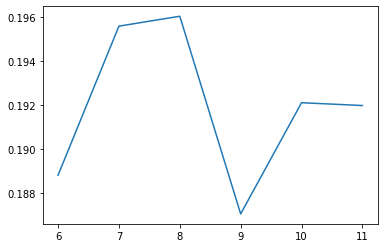

In [28]:
import matplotlib.pyplot as plt
x = [*(range(6, 12))]
y = coh
plt.plot(x, y)
plt.show()